In [38]:

import sys

import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/code/src')
from helper import df_ann_test, sr_num_frames_test

from pathlib import Path

from tqdm.auto import tqdm, trange

In [2]:
# 비디오
# Normal 비디오의 아무 세그먼트
# Anomaly 비디오의 non-anomaly 세그먼트
# Anomaly 비디오의 anomaly 세그먼트

# 텍스트
# normal 텍스트
# anomaly 텍스트

In [3]:
p_embedding_text_normal = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/embs_normal.npy')
p_embedding_text_anomaly = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/embs_anomalous.npy')
embeddings_text_normal = np.load(p_embedding_text_normal)
embeddings_text_anomaly = np.load(p_embedding_text_anomaly)
embeddings_text_normal = embeddings_text_normal[:1000]
embeddings_text_anomaly = embeddings_text_anomaly[:1000]

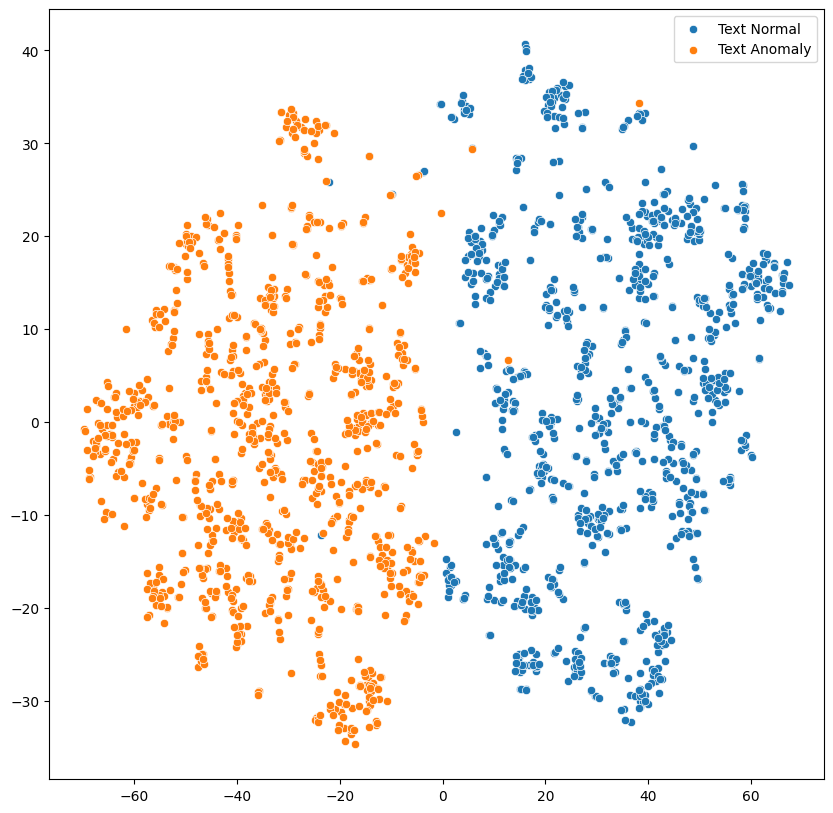

In [4]:
np.random.seed(0)
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init='pca', metric='cosine')
e = np.concatenate([
    embeddings_text_normal,
    embeddings_text_anomaly], axis=0)
ee = tsne.fit_transform(e)

a, b = len(embeddings_text_normal), len(embeddings_text_anomaly)
bdds = [a, a+b]

plt.figure(figsize=(10, 10))
sns.scatterplot(x=ee[:bdds[0], 0], y=ee[:bdds[0], 1], label='Text Normal')
sns.scatterplot(x=ee[bdds[0]:bdds[1], 0], y=ee[bdds[0]:bdds[1], 1], label='Text Anomaly')
plt.legend()
plt.show()

In [5]:
df_tmp = df_ann_test.join(sr_num_frames_test, on='raw_rel_video_path')
df_tmp['seg_s1'] = df_tmp['s1'] // 16
df_tmp['seg_e1'] = df_tmp['e1'] // 16
df_tmp['seg_s2'] = df_tmp['s2'] // 16
df_tmp['seg_e2'] = df_tmp['e2'] // 16
df_tmp.index = df_tmp['rel_video_path']
display(df_tmp)

,video,label,s1,e1,s2,e2,raw_label,raw_rel_video_path,rel_video_path,num_frames,seg_s1,seg_e1,seg_s2,seg_e2
rel_video_path,,,,,,,,,,,,,,
Abuse/Abuse028_x264.mp4,Abuse028_x264.mp4,Abuse,165,240,-1,-1,Abuse,Abuse/Abuse028_x264.mp4,Abuse/Abuse028_x264.mp4,1412,10,15,-1,-1
Abuse/Abuse030_x264.mp4,Abuse030_x264.mp4,Abuse,1275,1360,-1,-1,Abuse,Abuse/Abuse030_x264.mp4,Abuse/Abuse030_x264.mp4,1544,79,85,-1,-1
Arrest/Arrest001_x264.mp4,Arrest001_x264.mp4,Arrest,1185,1485,-1,-1,Arrest,Arrest/Arrest001_x264.mp4,Arrest/Arrest001_x264.mp4,2374,74,92,-1,-1
Arrest/Arrest007_x264.mp4,Arrest007_x264.mp4,Arrest,1530,2160,-1,-1,Arrest,Arrest/Arrest007_x264.mp4,Arrest/Arrest007_x264.mp4,3144,95,135,-1,-1
Arrest/Arrest024_x264.mp4,Arrest024_x264.mp4,Arrest,1005,3105,-1,-1,Arrest,Arrest/Arrest024_x264.mp4,Arrest/Arrest024_x264.mp4,3629,62,194,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vandalism/Vandalism007_x264.mp4,Vandalism007_x264.mp4,Vandalism,240,750,-1,-1,Vandalism,Vandalism/Vandalism007_x264.mp4,Vandalism/Vandalism007_x264.mp4,1146,15,46,-1,-1
Vandalism/Vandalism015_x264.mp4,Vandalism015_x264.mp4,Vandalism,2010,2700,-1,-1,Vandalism,Vandalism/Vandalism015_x264.mp4,Vandalism/Vandalism015_x264.mp4,2982,125,168,-1,-1
Vandalism/Vandalism017_x264.mp4,Vandalism017_x264.mp4,Vandalism,270,330,780,840,Vandalism,Vandalism/Vandalism017_x264.mp4,Vandalism/Vandalism017_x264.mp4,1011,16,20,48,52


In [6]:
p_embeddings_rootdir = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/dur=1.0_ol=0.5_fs=16/segments')
embeddings_normal, embeddings_anomaly = [], []
for p_emb in tqdm(sorted(p_embeddings_rootdir.glob('**/*.npy'))):
    rel_video_path = '/'.join(p_emb.parts[-3:-1]) + '.mp4'
    seg_s1, seg_e1, seg_s2, seg_e2 = df_tmp.loc[rel_video_path, ['seg_s1', 'seg_e1', 'seg_s2', 'seg_e2']].values
    seg_id = int(p_emb.stem)
    emb = np.load(p_emb)
    if seg_s1 <= seg_id <= seg_e1 or seg_s2 <= seg_id <= seg_e2:
        embeddings_anomaly.append(emb)
    else:
        embeddings_normal.append(emb)

  0%|          | 0/73696 [00:00<?, ?it/s]

In [7]:
len(embeddings_normal), len(embeddings_anomaly)

(68269, 5427)

In [8]:
embeddings_normal_subsampled = embeddings_normal[::len(embeddings_normal)//1000]
embeddings_anomaly_subsampled = embeddings_anomaly[::len(embeddings_anomaly)//1000]

In [9]:
# emb_normal_mean = embeddings_text_normal.mean(axis=0)
# emb_normal_mean /= np.linalg.norm(emb_normal_mean)
# emb_anomalous_mean = embeddings_text_anomaly.mean(axis=0)
# emb_anomalous_mean /= np.linalg.norm(emb_anomalous_mean)
# emb_proj = emb_anomalous_mean - emb_normal_mean
# emb_proj /= np.linalg.norm(emb_proj)
# emb_proj = emb_proj.astype(np.float32)
# embeddings_normal_subsampled -= np.einsum('i,j,hj->hi', emb_proj, emb_proj, embeddings_normal_subsampled)
# embeddings_anomaly_subsampled -= np.einsum('i,j,hj->hi', emb_proj, emb_proj, embeddings_anomaly_subsampled)

In [10]:
np.random.seed(0)
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init='pca', metric='cosine')
e = np.concatenate([
    embeddings_text_normal,
    embeddings_text_anomaly,
    embeddings_normal_subsampled,
    embeddings_anomaly_subsampled,
], axis=0)
ee = tsne.fit_transform(e)

a, b, c, d = len(embeddings_text_normal), len(embeddings_text_anomaly), len(embeddings_normal_subsampled), len(embeddings_anomaly_subsampled)
bdds = [a, a+b, a+b+c, a+b+c+d]

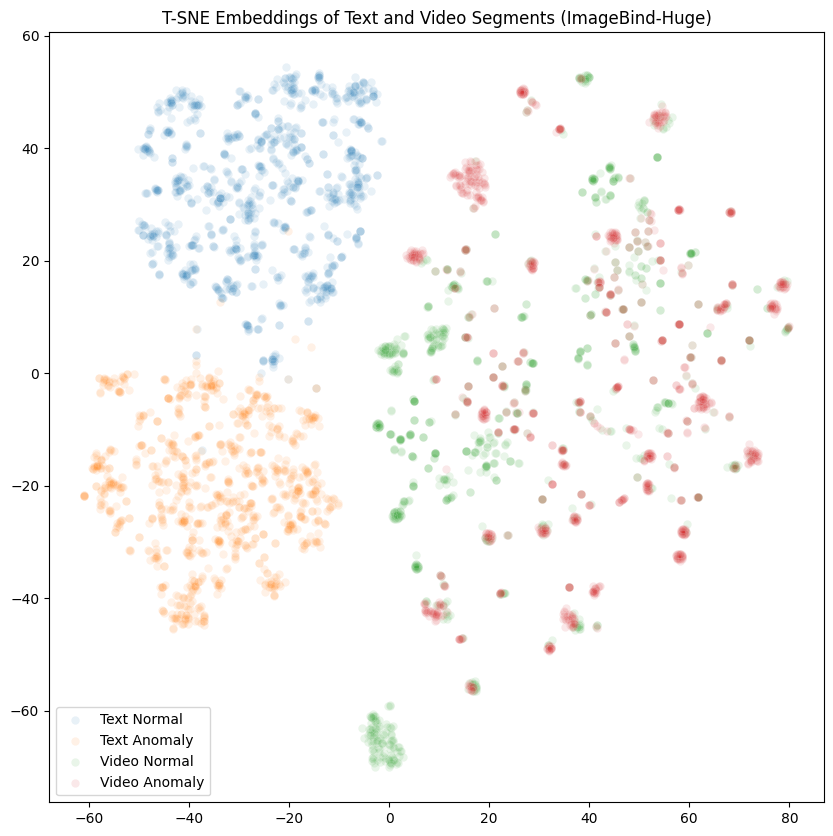

In [11]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=ee[:bdds[0], 0], y=ee[:bdds[0], 1], label='Text Normal', alpha=.1)
sns.scatterplot(x=ee[bdds[0]:bdds[1], 0], y=ee[bdds[0]:bdds[1], 1], label='Text Anomaly', alpha=.1)
sns.scatterplot(x=ee[bdds[1]:bdds[2], 0], y=ee[bdds[1]:bdds[2], 1], label='Video Normal', alpha=.1)
sns.scatterplot(x=ee[bdds[2]:bdds[3], 0], y=ee[bdds[2]:bdds[3], 1], label='Video Anomaly', alpha=.1)
plt.legend()
plt.title('T-SNE Embeddings of Text and Video Segments (ImageBind-Huge)')
plt.show()

# 비디오 단위로 찍어보기 

In [12]:
from collections import defaultdict

p_embeddings_rootdir = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/dur=1.0_ol=0.5_fs=16/segments')
video_embeddings = defaultdict(lambda : {'normal': [], 'anomaly': []})
for p_emb in tqdm(sorted(p_embeddings_rootdir.glob('**/*.npy'))):
    rel_video_path = '/'.join(p_emb.parts[-3:-1]) + '.mp4'
    seg_s1, seg_e1, seg_s2, seg_e2 = df_tmp.loc[rel_video_path, ['seg_s1', 'seg_e1', 'seg_s2', 'seg_e2']].values
    seg_id = int(p_emb.stem)
    emb = np.load(p_emb)
    if seg_s1 <= seg_id <= seg_e1 or seg_s2 <= seg_id <= seg_e2:
        video_embeddings[rel_video_path]['anomaly'].append(emb)
    else:
        video_embeddings[rel_video_path]['normal'].append(emb)

video_embeddings = {
    k: {
        'normal': np.array(v['normal']),
        'anomaly': np.array(v['anomaly']),
    } for k, v in video_embeddings.items()
}

  0%|          | 0/73696 [00:00<?, ?it/s]

In [13]:
keys = list(video_embeddings.keys())

In [14]:
e_text_normals_all = np.load(p_embedding_text_normal)
e_text_anomalies_all = np.load(p_embedding_text_anomaly)

In [15]:
e_text_normals = e_text_normals_all[:3000]
e_text_anomalies = e_text_anomalies_all[:3000]

In [16]:
preds = []
gts = []
e_texts = np.concatenate([e_text_normals, e_text_anomalies], axis=0)
for idx in trange(len(keys)):
    e_video_normals = video_embeddings[keys[idx]]['normal']
    e_video_anomalies = video_embeddings[keys[idx]]['anomaly']
    if e_video_anomalies.shape[0] == 0:
        e_videos = e_video_normals
    else:
        e_videos = np.concatenate([e_video_normals, e_video_anomalies], axis=0)
    dots = e_videos @ e_texts.T
    args = np.argsort(dots, axis=1)[:, ::-1]

    e_text_normals_nn = np.take(e_text_normals, np.argsort(dots[:, :len(e_text_normals)])[:, ::-1][:, :1], axis=0).mean(axis=1)
    e_text_anomalies_nn = np.take(e_text_anomalies, np.argsort(dots[:, len(e_text_normals):])[:, ::-1][:, :1], axis=0).mean(axis=1)
    e_text_mean = np.take(e_texts, args[:, :10], axis=0).mean(axis=1).mean(axis=0)

    logits = np.einsum('ij,ij->i', e_videos, e_text_anomalies_nn - e_text_mean)
    # logits -= np.mean(logits)
    logits -= 5
    probs = 1 / (1 + np.exp(-logits))

    s1, e1, s2, e2 = df_tmp.loc[keys[idx], ['s1', 'e1', 's2', 'e2']].values
    num_frames = df_tmp.loc[keys[idx], 'num_frames']
    preds, pred_counts, gt = np.zeros(num_frames), np.zeros(num_frames), np.zeros(num_frames)
    if s1 != -1:
        gt[s1:e1] = 1
    if s2 != -1:
        gt[s2:e2] = 1
    preds += np.tile(probs, 16)[:]
    preds.append(probs)
    gts.append(gt)
    break
preds = np.concatenate(preds)
gts = np.concatenate(gts)
from sklearn.metrics import roc_auc_score
roc_auc_score(gts, preds)

  0%|          | 0/290 [00:00<?, ?it/s]

ValueError: operands could not be broadcast together with shapes (1412,) (1488,) (1412,) 

(989, 1024)


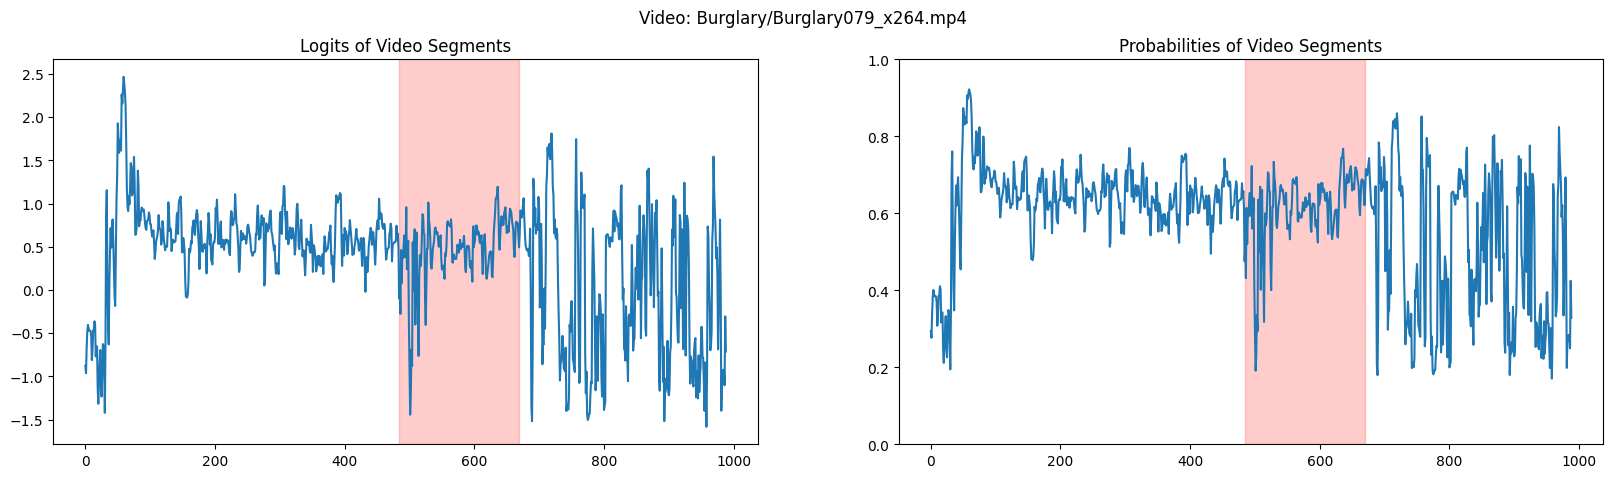

In [28]:
idx = 30

e_video_normals = video_embeddings[keys[idx]]['normal']
e_video_anomalies = video_embeddings[keys[idx]]['anomaly']
if e_video_anomalies.shape[0] == 0:
    e_videos = e_video_normals
else:
    e_videos = np.concatenate([e_video_normals, e_video_anomalies], axis=0)
e_texts = np.concatenate([e_text_normals, e_text_anomalies], axis=0)

e_text_normals_nn = np.take(e_text_normals, np.argsort(e_videos @ e_text_normals.T)[:, ::-1][:, :1], axis=0).mean(axis=1)
e_text_anomalies_nn = np.take(e_text_anomalies, np.argsort(e_videos @ e_text_anomalies.T)[:, ::-1][:, :1], axis=0).mean(axis=1)
e_text_mean = np.take(e_texts, np.argsort(e_videos @ e_texts.T)[:, ::-1][:, :10], axis=0).mean(axis=1).mean(axis=0)
print(e_text_anomalies_nn.shape)

logits = np.einsum('ij,ij->i', e_videos, e_text_anomalies_nn - e_text_mean)
# logits -= np.mean(logits)
logits -= 5
probs = 1 / (1 + np.exp(-logits))

seg_s1, seg_e1, seg_s2, seg_e2 = df_tmp.iloc[idx][['seg_s1', 'seg_e1', 'seg_s2', 'seg_e2']].values
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
ax = axes[0]
ax.plot(logits)
if seg_s1 != -1:
    ax.axvspan(seg_s1, seg_e1, color='red', alpha=0.2)
if seg_s2 != -1:
    ax.axvspan(seg_s2, seg_e2, color='red', alpha=0.2)
ax.set_title('Logits of Video Segments')
ax = axes[1]
ax.plot(probs)
if seg_s1 != -1:
    ax.axvspan(seg_s1, seg_e1, color='red', alpha=0.2)
if seg_s2 != -1:
    ax.axvspan(seg_s2, seg_e2, color='red', alpha=0.2)
ax.set_title('Probabilities of Video Segments')
ax.set_ylim(0, 1)
fig.suptitle(f'Video: {keys[idx]}')
plt.show()

In [29]:
embs_video = np.concatenate([video_embeddings[keys[idx]]['normal'], video_embeddings[keys[idx]]['normal']], axis=0)
embs_video_mean = embs_video.mean(axis=0)
embs_video_mean /= np.linalg.norm(embs_video_mean)
embs_video_mean = embs_video_mean.astype(np.float32)
emb_text_anomaly_mean = embeddings_text_anomaly.mean(axis=0)
emb_text_anomaly_mean /= np.linalg.norm(emb_text_anomaly_mean)
embs_video -= np.einsum('i,j,j->i', emb_text_anomaly_mean, emb_text_anomaly_mean, embs_video_mean)

In [88]:
np.random.seed(1)
idx = 31
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init='pca', metric='cosine')
z_bg = torch.load((
    Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/tmf_frames=64')
    / df_tmp.loc[keys[idx]]['rel_video_path']).with_suffix('.pt'), weights_only=True
).numpy()
e = np.concatenate([
    embeddings_text_normal,
    embeddings_text_anomaly,
    video_embeddings[keys[idx]]['normal'],
    video_embeddings[keys[idx]]['anomaly'],
    # embs_video[:len(video_embeddings[keys[idx]]['normal'])],
    # embs_video[len(video_embeddings[keys[idx]]['normal']):],
    [z_bg],
], axis=0)
ee = tsne.fit_transform(e)

a, b, c, d = len(embeddings_text_normal), len(embeddings_text_anomaly), len(video_embeddings[keys[idx]]['normal']), len(video_embeddings[keys[idx]]['anomaly'])
bdds = [a, a+b, a+b+c, a+b+c+d]
display(df_tmp.loc[keys[idx]])

video                          Burglary092_x264.mp4
label                                      Burglary
s1                                              240
e1                                              420
s2                                               -1
e2                                               -1
raw_label                                  Burglary
raw_rel_video_path    Burglary/Burglary092_x264.mp4
rel_video_path        Burglary/Burglary092_x264.mp4
num_frames                                      625
seg_s1                                           15
seg_e1                                           26
seg_s2                                           -1
seg_e2                                           -1
Name: Burglary/Burglary092_x264.mp4, dtype: object

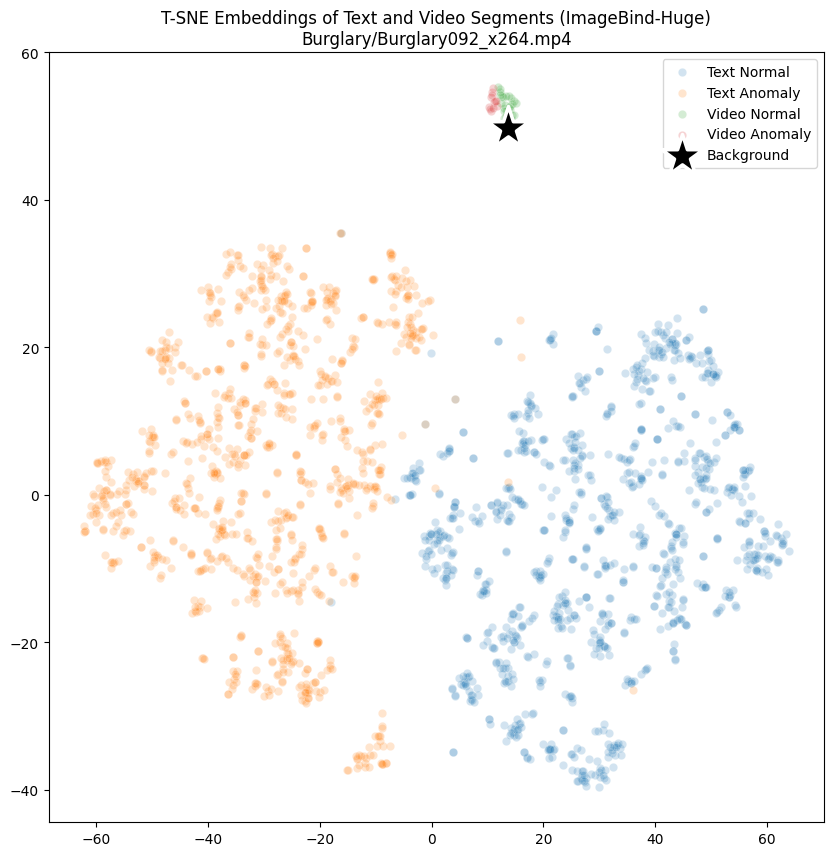

In [54]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=ee[:bdds[0], 0], y=ee[:bdds[0], 1], label='Text Normal', alpha=.2)
sns.scatterplot(x=ee[bdds[0]:bdds[1], 0], y=ee[bdds[0]:bdds[1], 1], label='Text Anomaly', alpha=.2)
sns.scatterplot(x=ee[bdds[1]:bdds[2], 0], y=ee[bdds[1]:bdds[2], 1], label='Video Normal', alpha=.2)
sns.scatterplot(x=ee[bdds[2]:bdds[3], 0], y=ee[bdds[2]:bdds[3], 1], label='Video Anomaly', alpha=.2)
sns.scatterplot(x=ee[-1:, 0], y=ee[-1:, 1], label='Background', color='black', s=1000, marker='*')
plt.legend()
plt.title(f'T-SNE Embeddings of Text and Video Segments (ImageBind-Huge)\n{keys[idx]}')
plt.show()

In [ ]:
embs = np.concatenate([embeddings_text_normal, embeddings_text_anomaly])
with np.printoptions(threshold=sys.maxsize, linewidth=sys.maxsize):
    display(np.argsort(
        (video_embeddings[keys[idx]]['normal'] - np.einsum('i,j,j->i', emb_text_anomaly_mean, emb_text_anomaly_mean, z_bg))
            @ embs.T,
        axis=1
    )[:, -10:])
    print((np.argsort((video_embeddings[keys[idx]]['normal']) @ embs.T, axis=1)[:, -10:] >= len(embs)//2).mean())
    print((np.argsort((video_embeddings[keys[idx]]['anomaly']) @ embs.T, axis=1)[:, -10:] >= len(embs)//2).mean())

array([[1106, 1348, 1262, 1254, 1357, 1792, 1192, 1805,   53, 1662],
       [1106, 1792, 1262, 1348, 1805, 1254, 1357,   53, 1192, 1662],
       [1321, 1262, 1899, 1805,   53, 1192, 1254, 1348, 1357, 1662],
       [1262, 1321,   53, 1805, 1254, 1192, 1899, 1348, 1357, 1662],
       [1567, 1254, 1192, 1805, 1321,   53, 1899, 1357, 1348, 1662],
       [1526,   53, 1262, 1187, 1055, 1321, 1357, 1899, 1662, 1348],
       [1567, 1192, 1526, 1262, 1899, 1321, 1254, 1348, 1662, 1357],
       [1870, 1321, 1262, 1192, 1805, 1899, 1254, 1662, 1348, 1357],
       [1015,   53, 1348, 1662, 1567, 1805, 1870, 1192, 1254, 1357],
       [1348, 1567, 1666, 1662, 1870,   53, 1805, 1192, 1254, 1357],
       [1321, 1348,   28, 1870, 1192, 1805, 1662,   53, 1357, 1254],
       [1321,   28, 1666,   53, 1805, 1192, 1662, 1015, 1254, 1357],
       [1348, 1567, 1666, 1321, 1192, 1805, 1662, 1015, 1254, 1357],
       [  53, 1805, 1348, 1755, 1321, 1567, 1662, 1015, 1254, 1357],
       [1805,   53, 1879, 1567, 14

1.0
1.0


In [ ]:
txt_norms = torch.load('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/embs_normal.pt', weights_only=True)
txt_anoms = torch.load('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/embs_anomalous.pt', weights_only=True)

In [95]:
z_txt_norm = txt_norms['embeddings'].numpy()
z_txt_anom = txt_anoms['embeddings'].numpy()
mu_txt_norm = z_txt_norm.mean(axis=0)
mu_txt_norm /= np.linalg.norm(mu_txt_norm)
mu_txt_anom = z_txt_anom.mean(axis=0)
mu_txt_anom /= np.linalg.norm(mu_txt_anom)
z_txt = np.concatenate([z_txt_norm, z_txt_anom], axis=0)
txts = np.array(txt_norms['texts'] + txt_anoms['texts'])
num_norms, num_anoms = len(txt_norms['texts']), len(txt_anoms['texts'])

In [91]:
idx = 31
display(df_tmp.loc[keys[idx]])
z_bg = torch.load((
    Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/tmf_frames=64')
    / df_tmp.loc[keys[idx]]['rel_video_path']).with_suffix('.pt'), weights_only=True
).numpy()

video                          Burglary092_x264.mp4
label                                      Burglary
s1                                              240
e1                                              420
s2                                               -1
e2                                               -1
raw_label                                  Burglary
raw_rel_video_path    Burglary/Burglary092_x264.mp4
rel_video_path        Burglary/Burglary092_x264.mp4
num_frames                                      625
seg_s1                                           15
seg_e1                                           26
seg_s2                                           -1
seg_e2                                           -1
Name: Burglary/Burglary092_x264.mp4, dtype: object

In [127]:
z_diff = z_txt_anom.mean(axis=0) - z_txt_norm.mean(axis=0)
z_diff /= np.linalg.norm(z_diff)
z_bg_proj = np.einsum('i,j,j->i', z_diff, z_diff, z_bg)
dots = z_txt @ z_bg
args = np.argsort(dots, axis=0)[::-1][:10]
txts[args], dots[args]

(array(['Anomalous: A vehicle losing control and crashing into the outdoor seating area.',
        'Anomalous: A car loses control and crashes into the outdoor seating area.',
        'Anomalous: A vehicle recklessly drives into a dining area, hitting tables and customers.',
        'Anomalous: A car jumps the curb and crashes into an outdoor café area.',
        "Anomalous: A car runs off the road, crashing into the café's seating area.",
        'Anomalous: A car swerves and crashes into the outdoor seating area.',
        "Anomalous: A driver crashes their vehicle into the café's outdoor seating area.",
        'Anomalous: A car loses control and crashes into the outdoor dining area.',
        'Anomalous: A car veering off the road and crashing into an outdoor café.',
        'Anomalous: A car veers off the street and crashes into the café area.'],
       dtype='<U137'),
 array([34.974686, 33.94665 , 33.89232 , 33.831497, 33.754353, 33.72457 ,
        32.898594, 32.69742 , 32.580597

In [128]:
args_norm = np.argsort(dots[:num_norms], axis=0)[::-1][:10]
txts[args_norm], dots[args_norm]

(array(['Normal: A car parks smoothly into the spot and the driver exits calmly.',
        'Normal: A car pulls into a drive-thru to place an order.',
        'Normal: A car smoothly going through a drive-thru service.',
        'Normal: A car passes through a drive-thru fast food lane.',
        'Normal: A calmly operating fast food drive-thru.',
        'Normal: A car stops at the drive-thru to order food, chatting with the attendant.',
        'Normal: A taxi is picking up a passenger by the sidewalk.',
        'Normal: A person walks calmly down the sidewalk, passing by shops without incident.',
        'Normal: A security camera is monitoring a quiet convenience store.',
        'Normal: A driver stops at a red traffic light without incident.'],
       dtype='<U137'),
 array([27.027294, 26.590775, 25.74174 , 25.702477, 25.55133 , 25.217434,
        25.06897 , 24.99353 , 24.883072, 24.69873 ], dtype=float32))

In [129]:
args_anom = num_norms + np.argsort(dots[num_norms:], axis=0)[::-1][:10]
txts[args_anom], dots[args_anom]

(array(['Anomalous: A vehicle losing control and crashing into the outdoor seating area.',
        'Anomalous: A car loses control and crashes into the outdoor seating area.',
        'Anomalous: A vehicle recklessly drives into a dining area, hitting tables and customers.',
        'Anomalous: A car jumps the curb and crashes into an outdoor café area.',
        "Anomalous: A car runs off the road, crashing into the café's seating area.",
        'Anomalous: A car swerves and crashes into the outdoor seating area.',
        "Anomalous: A driver crashes their vehicle into the café's outdoor seating area.",
        'Anomalous: A car loses control and crashes into the outdoor dining area.',
        'Anomalous: A car veering off the road and crashing into an outdoor café.',
        'Anomalous: A car veers off the street and crashes into the café area.'],
       dtype='<U137'),
 array([34.974686, 33.94665 , 33.89232 , 33.831497, 33.754353, 33.72457 ,
        32.898594, 32.69742 , 32.580597

In [130]:
dots[args_norm].mean(), dots[args_anom].mean(), dots.mean()

(25.547535, 33.477467, 9.516411)

In [131]:
args_new = np.argsort(dots * np.concatenate([np.ones((num_norms,)), dots[args_norm].mean() / dots[args_anom].mean() * np.ones((num_norms,))]), axis=0)[::-1][:10]
txts[args_new], dots[args_new]

(array(['Normal: A car parks smoothly into the spot and the driver exits calmly.',
        'Anomalous: A vehicle losing control and crashing into the outdoor seating area.',
        'Normal: A car pulls into a drive-thru to place an order.',
        'Anomalous: A car loses control and crashes into the outdoor seating area.',
        'Anomalous: A vehicle recklessly drives into a dining area, hitting tables and customers.',
        'Anomalous: A car jumps the curb and crashes into an outdoor café area.',
        "Anomalous: A car runs off the road, crashing into the café's seating area.",
        'Normal: A car smoothly going through a drive-thru service.',
        'Anomalous: A car swerves and crashes into the outdoor seating area.',
        'Normal: A car passes through a drive-thru fast food lane.'],
       dtype='<U137'),
 array([27.027294, 34.974686, 26.590775, 33.94665 , 33.89232 , 33.831497,
        33.754353, 25.74174 , 33.72457 , 25.702477], dtype=float32))